<center>
    <img src="http://kukuruku.co/uploads/topics/preview/00/00/01/47/c854dac039.png" width="40%" />
    <br />
    <h1>Introduction to Machine Learning with Scikit-Learn</h1>
    <br /><br />
    <h1>Shagun Sodhani (<a href="https://twitter.com/shagunsodhani">@shagunsodhani</a>)</h1>
    <br /><br />
    <h2>Based on <a href="https://github.com/DistrictDataLabs/machine-learning">work </a> by <a href="https://github.com/DistrictDataLabs">@DistrictDataLabs</a></h2>
</center>

# Machine Learning

## Supervised

### \* Classification
### \* Regression

## Unsupervised

###  \* Clustering
###  \* Feature Selection

## Scikit-Learn 

### \* Machine learning library

### \* Fast analysis of small to medium sized data sets

### \* Classification, Regression, Clustering, Feature extraction, etc

In [1]:
%matplotlib inline

#To make compatible with Python2 and Python3
from __future__ import print_function

# Things we'll need later
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import cross_validation as cv

# Load the example datasets
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import load_linnerud

In [2]:
# Boston house prices dataset (reals, regression)
boston = load_boston()
print ("Boston: %i samples %i features" % boston.data.shape)

# Iris flower dataset (reals, multi-label classification)
iris   = load_iris()
print ("Iris: %i samples %i features" % iris.data.shape)

# Diabetes dataset (reals, regression)
diabetes = load_diabetes()
print ("Diabetes: %i samples %i features" % diabetes.data.shape)

# Hand-written digit dataset (multi-label classification)
digits = load_digits()
print ("Digits: %i samples %i features" % digits.data.shape)

# Linnerud psychological and exercise dataset (multivariate regression)
linnerud = load_linnerud()
print ("Linnerud: %i samples %i features" % linnerud.data.shape)

Boston: 506 samples 13 features
Iris: 150 samples 4 features
Diabetes: 442 samples 10 features
Digits: 1797 samples 64 features
Linnerud: 20 samples 3 features


In [3]:
print(boston.keys())

dict_keys(['target', 'DESCR', 'feature_names', 'data'])


In [4]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

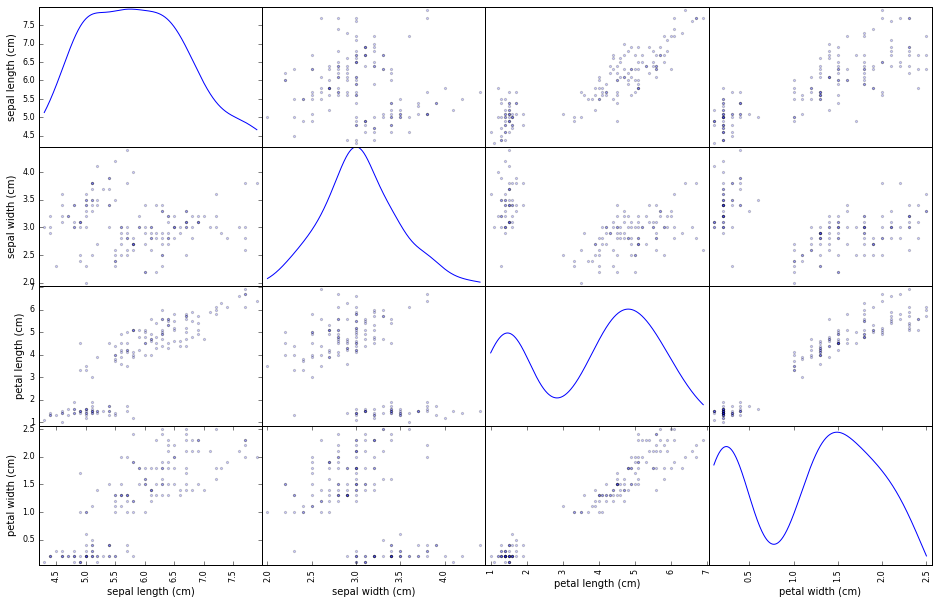

In [6]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

fig = scatter_matrix(df, alpha=0.2, figsize=(16, 10), diagonal='kde')

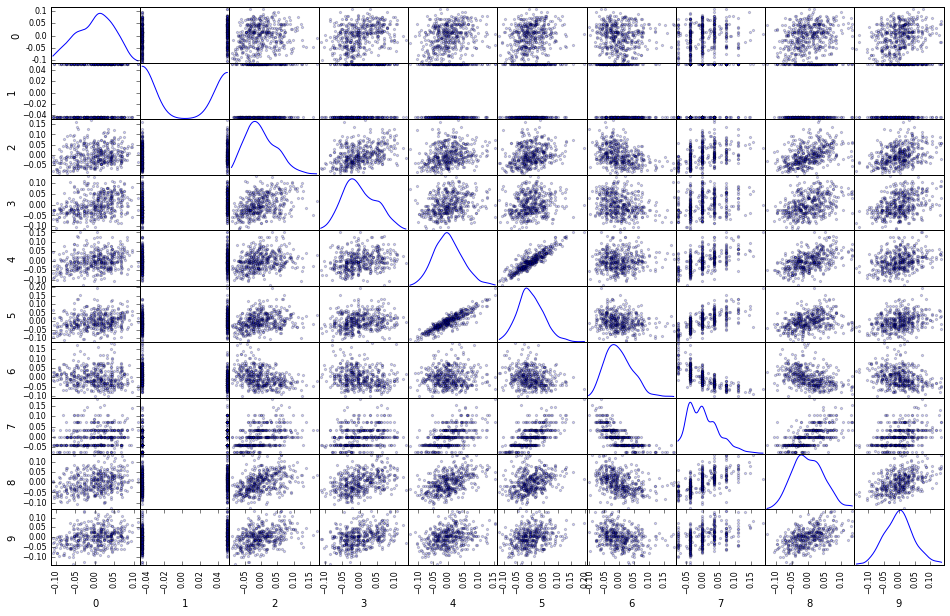

In [7]:
df = pd.DataFrame(diabetes.data)
fig = scatter_matrix(df, alpha=0.2, figsize=(16, 10), diagonal='kde')

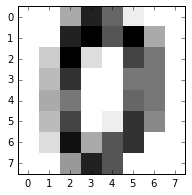

In [8]:
import random
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
# plt.imshow(digits.images[0], cmap='gray_r')
plt.show()

## Regressions

### Predict continous values given the inout features.

## Linear Regression
### Linear regression fits a linear model (a line in two dimensions) to the data.

In [9]:
from sklearn.linear_model import LinearRegression

# Fit regression to diabetes dataset
model = LinearRegression()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 2859.690
Coefficient of Determination: 0.518


In [10]:
r2_score?

## Perceptron

### A primitive neural network that learns weights for input vectors and transfers the weights through a network to make a prediction.

In [11]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 11858.932
Coefficient of Determination: -1.000


## k-Nearest Neighbor Regression

### Makes predictions by locating similar cases and returning the average majority.

In [12]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 2342.556
Coefficient of Determination: 0.605


## Classification and Regression Trees (CART)

### Makes splits of the best separation of the data for the predictions being made.

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 0.000
Coefficient of Determination: 1.000


## Random Forest

### Random forest is an ensemble method that creates a number of decision trees using the CART algorithm, each on a different subset of the data. The general approach to creating the ensemble is bootstrap aggregation of the decision trees (bagging).

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 710.678
Coefficient of Determination: 0.880


## AdaBoost

### Adaptive Boosting (AdaBoost) is an ensemble method that sums the predictions made by multiple decision trees. Additional models are added and trained on instances that were incorrectly predicted (boosting)

In [15]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 2385.064
Coefficient of Determination: 0.598


## Support Vector Machines

### Uses the SVM algorithm (transforming the problem space into higher dimensions in order to use kernel methods) to make predictions for a linear function.

In [16]:
from sklearn.svm import SVR

model = SVR()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 6024.465
Coefficient of Determination: -0.016


## Regularization

### Regularization methods decrease the over-fitting of a model by penalizing complexity.

## Ridge Regression

### Square of the absolute magnitiude of the coefficients (the L2 norm)

In [17]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 2890.445
Coefficient of Determination: 0.513


## LASSO

### Least Absolute Shrinkage and Selection Operator (LASSO) penalizes the least squares regression on the absolute magnitude of the coefficients (the L1 norm)

In [18]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print ("Mean Squared Error: %0.3f" % mse(expected, predicted))
print ("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 2912.522
Coefficient of Determination: 0.509


## Classification

### Given labeled input data (with two or more labels), predict the discrete class of input data.

In [19]:
def plot_surface(classifier, subtitle):
    n_classes = 3
    plot_colors = "bry"
    plot_step = 0.02

    # Load data
    iris = load_iris()
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(13)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = classifier.fit(X, y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.axis("tight")

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.Paired)

        plt.axis("tight")

    plt.suptitle(subtitle)
    plt.legend()
    plt.show()

## Logistic Regression

### Fits a logistic model to data and makes predictions about the probability of a categorical event (between 0 and 1).

In [20]:
from sklearn.linear_model import LogisticRegression

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = LogisticRegression()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      0.80      0.89        10
          2       0.80      1.00      0.89         8

avg / total       0.95      0.93      0.93        30



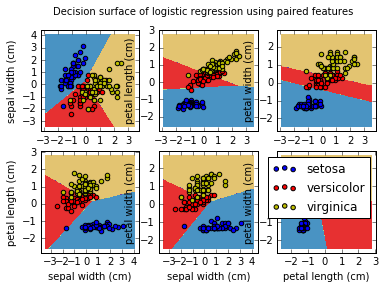

In [21]:
plot_surface(model, subtitle = "Decision surface of logistic regression using paired features")

## LDA

Linear Discriminate Analysis (LDA) fits a conditional probability density function (Gaussian) to the attributes of the classes. The discrimination function is linear.

In [22]:
from sklearn.lda import LDA

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = LDA()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.90      0.94      0.92        47
          2       1.00      0.97      0.99        36
          3       0.94      0.89      0.92        38
          4       1.00      0.97      0.98        33
          5       1.00      0.98      0.99        46
          6       1.00      0.97      0.99        36
          7       0.97      1.00      0.99        33
          8       0.81      0.84      0.82        25
          9       0.86      0.91      0.88        33

avg / total       0.95      0.95      0.95       360



/usr/local/lib/python3.4/dist-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


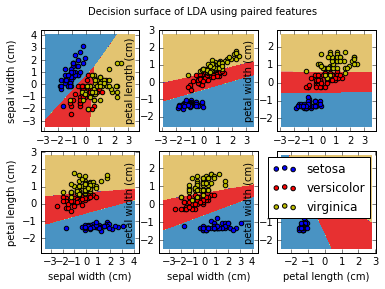

In [23]:
plot_surface(model, subtitle = "Decision surface of LDA using paired features")

## Naive Bayes

### Bayes Theorem (with a naive assumption) to model the conditional relationship of each attribute to the class.

In [24]:
from sklearn.naive_bayes import GaussianNB

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = GaussianNB()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.80      1.00      0.89         8
          2       1.00      0.75      0.86         8

avg / total       0.95      0.93      0.93        30



In [25]:
%matplotlib inline

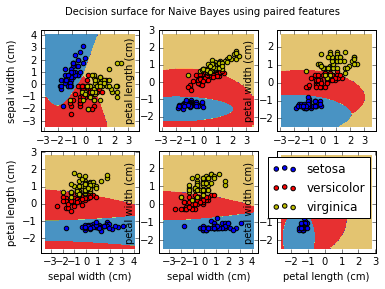

In [26]:
plot_surface(model, subtitle = "Decision surface for Naive Bayes using paired features")

## k-Nearest Neighbor

### Locate similar instances via a similarity function or distance and averaging the majority of the most similar. 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = KNeighborsClassifier()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        32
          1       0.96      1.00      0.98        52
          2       1.00      1.00      1.00        38
          3       1.00      0.97      0.99        34
          4       1.00      1.00      1.00        36
          5       1.00      0.98      0.99        43
          6       1.00      1.00      1.00        33
          7       0.97      1.00      0.99        33
          8       1.00      0.93      0.96        29
          9       0.97      1.00      0.98        30

avg / total       0.99      0.99      0.99       360



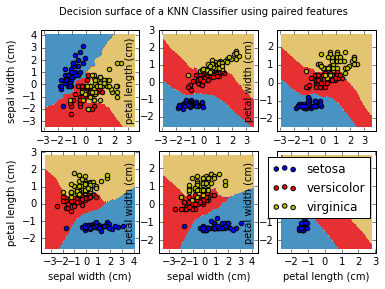

In [28]:
plot_surface(KNeighborsClassifier(), subtitle = "Decision surface of a KNN Classifier using paired features")

## Decision Trees

### Decision trees use the CART algorithm to make predictions by making splits that best fit the data.

In [29]:
from sklearn.tree import DecisionTreeClassifier

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = DecisionTreeClassifier()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.88      0.88      0.88         8
          2       0.88      0.88      0.88         8

avg / total       0.93      0.93      0.93        30



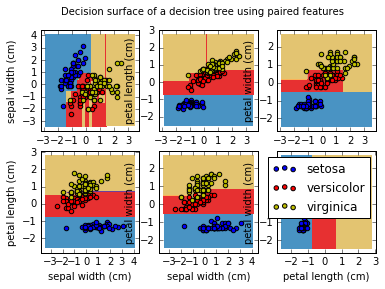

In [30]:
plot_surface(DecisionTreeClassifier(), subtitle = "Decision surface of a decision tree using paired features")

## SVMs

### Support Vector Machines (SVM) uses points in transformed problem space that separates the classes into groups.

In [31]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)
        
    model.fit(X_train, y_train)
    expected   = y_test
    predicted  = model.predict(X_test)

    print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.94      1.00      0.97        47
          2       1.00      1.00      1.00        36
          3       1.00      0.97      0.99        38
          4       1.00      1.00      1.00        33
          5       1.00      0.96      0.98        46
          6       1.00      0.97      0.99        36
          7       1.00      1.00      1.00        33
          8       0.92      0.92      0.92        25
          9       0.94      0.97      0.96        33

avg / total       0.98      0.98      0.98       360

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.96      1.00      0.98        47
          2       1.00      1.00      1.00        36
          3       1.00      0.97      0.99        38
          4       1.00      1.00      1.00        33
          5       1.00      0.96      0.98

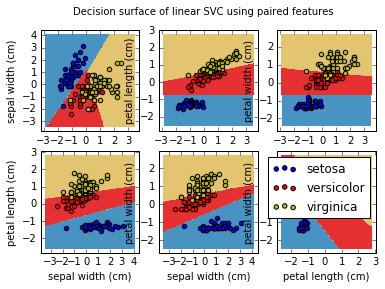

In [32]:
plot_surface(SVC(kernel='linear'), subtitle = "Decision surface of linear SVC using paired features")

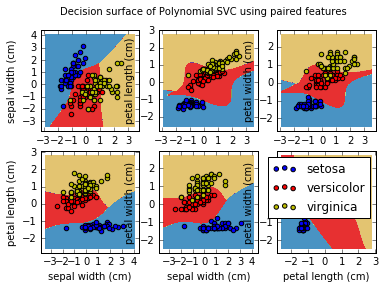

In [33]:
plot_surface(SVC(kernel='poly', degree=3), subtitle = "Decision surface of Polynomial SVC using paired features")

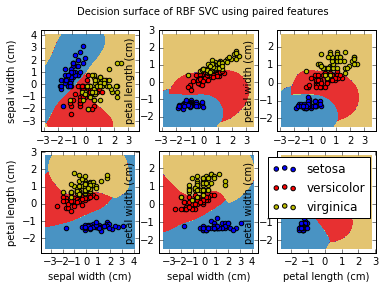

In [34]:
plot_surface(SVC(kernel='rbf'), subtitle = "Decision surface of RBF SVC using paired features")

## Random Forest

### Ensemble of decision trees on different subsets of the dataset. The ensemble is created by bootstrap aggregation (bagging).

In [35]:
from sklearn.ensemble import RandomForestClassifier

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = RandomForestClassifier()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print (classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        33
          1       0.94      1.00      0.97        47
          2       1.00      0.97      0.99        36
          3       0.97      0.92      0.95        38
          4       1.00      0.97      0.98        33
          5       0.98      0.93      0.96        46
          6       0.97      0.97      0.97        36
          7       0.92      1.00      0.96        33
          8       0.96      0.92      0.94        25
          9       0.91      0.94      0.93        33

avg / total       0.96      0.96      0.96       360



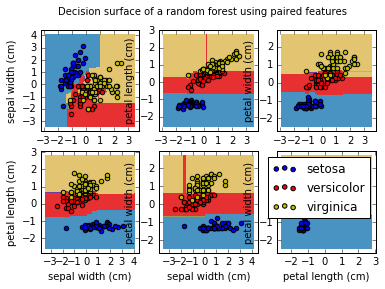

In [36]:
plot_surface(model, subtitle = "Decision surface of a random forest using paired features")

## Clustering

### Find patterns in unlabeled data. They are usually grouped into two main categories: centroidal (find the centers of clusters) and hierarchical (find clusters of clusters).

### In order to explore clustering, we'll have to generate some fake datasets to use.

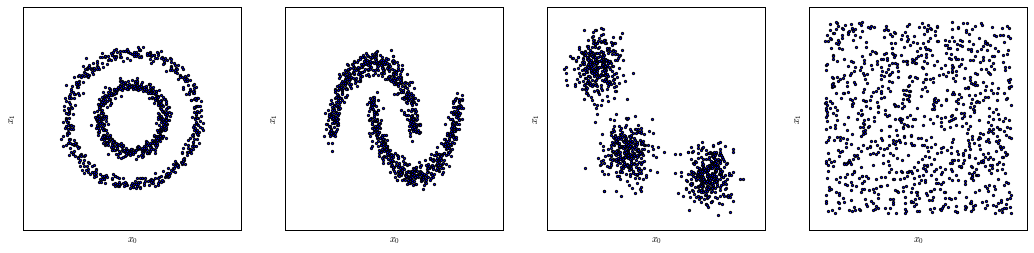

In [37]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

N = 1000 # Number of samples in each cluster

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

circles = make_circles(n_samples=N, factor=.5, noise=.05)
moons   = make_moons(n_samples=N, noise=.08)
blobs   = make_blobs(n_samples=N, random_state=9)
noise   = np.random.rand(N, 2), None

# Let's see what the data looks like!
fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:,0], X[:,1], marker='.')

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

## K-Means Clustering

### Partition N samples into k clusters, where each sample belongs to a cluster to which it has the closest mean of the neighbors. This problem is NP-hard, but there are good estimations.

/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  0, n_samples - 1, init_size)
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  0, n_samples - 1, init_size)
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  0, n_samples - 1, init_size)
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  0, n_samples - 1, init_size)
/usr/local/lib/python3.4/dist-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randint(0, 999 + 1) instead
  0, n_samples - 1, self.batch_size)
/usr/local/lib/python3.4/dist-pa

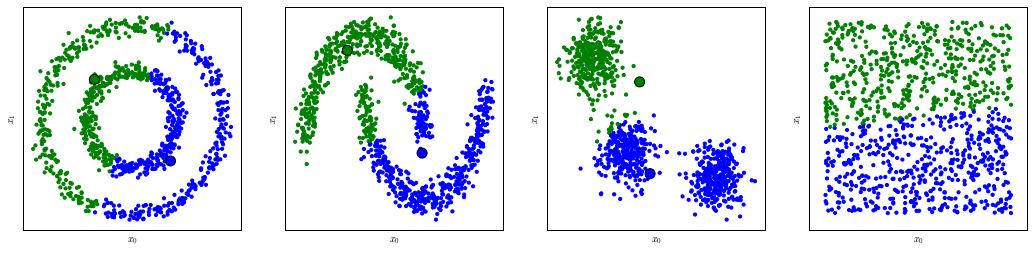

In [38]:
from sklearn.cluster import MiniBatchKMeans

fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # Fit the model with our algorithm
    model = MiniBatchKMeans(n_clusters=2)
    model.fit(X)
    
    # Make Predictions
    predictions = model.predict(X)
    
    # Find centers
    centers = model.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

## Affinity Propagation

### Clustering based on the concept of "message passing" between data points. 
### Does not require the number of clusters to be determined or estimated before running the algorithm. 

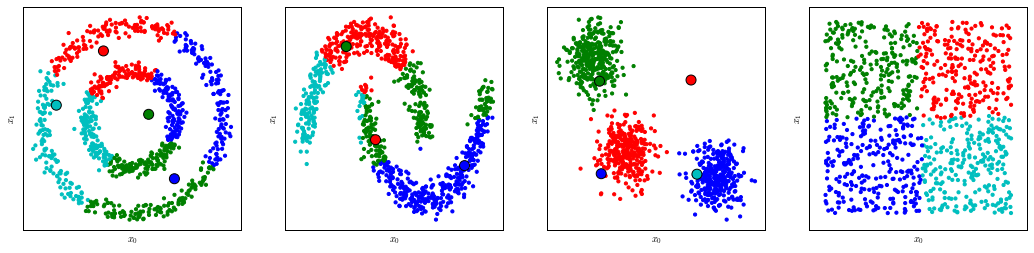

In [39]:
from sklearn.cluster import AffinityPropagation


fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # Fit the model with our algorithm
    model = AffinityPropagation(damping=.9, preference=-200)
    model.fit(X)
    
    # Make Predictions
    predictions = model.predict(X)
    
    # Find centers
    centers = model.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()



In [40]:
LDA?